Import Library

In [ ]:
import dask.dataframe as dd
import pandas as pd

 Load your dataset

In [ ]:
df = dd.read_csv('imdb_top_1000.csv', dtype={'Released_Year': 'object', 'Meta_score': 'float64'})

Use map_partitions to handle splitting and stacking per partition

In [ ]:
def split_and_stack(s):
    return s.str.split(',').explode().str.strip()



 Explode genres for counting

In [ ]:
exploded_genres = df['Genre'].map_partitions(split_and_stack, meta=('Genre', 'object'))

 Count genre occurrences

In [ ]:
genre_counts = exploded_genres.value_counts().compute()
print("Top 10 Genres:\n", genre_counts.head(10))

Top 10 Genres:
 Genre
Action       189
Adventure    196
Animation     82
Biography    109
Comedy       233
Crime        209
Drama        724
Family        56
Fantasy       66
Film-Noir     19
Name: count, dtype: int64


 Movies per Decade bar chart

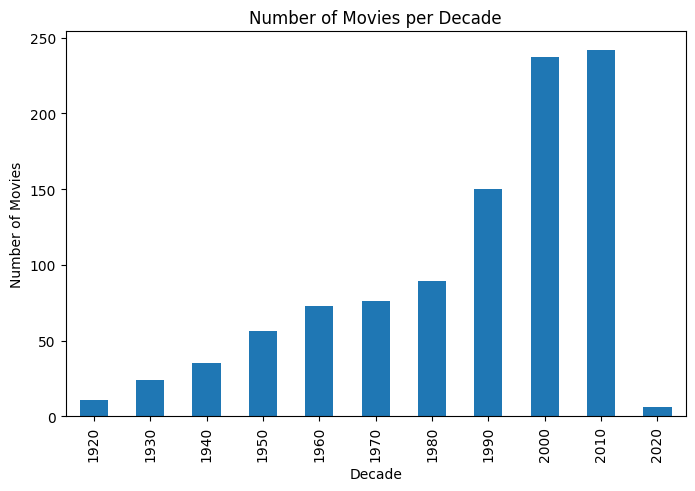

In [27]:
import matplotlib.pyplot as plt

movies_per_decade.plot(kind='bar', figsize=(8,5), title='Number of Movies per Decade')
plt.xlabel('Decade')
plt.ylabel('Number of Movies')
plt.show()



 Top 10 Genres bar chart

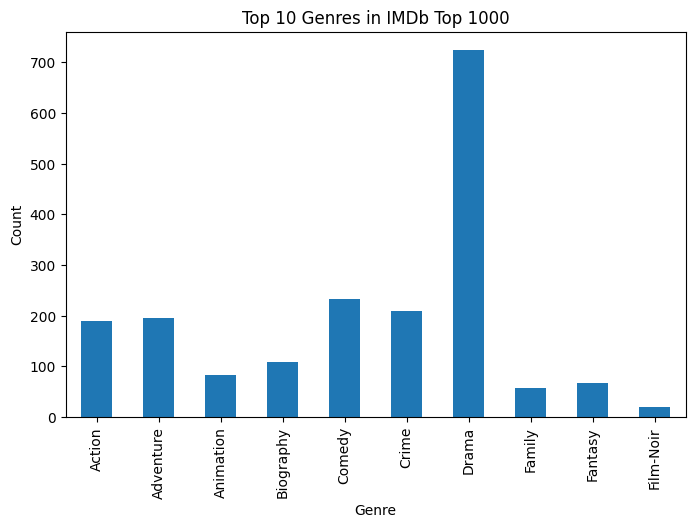

In [28]:
genre_counts.head(10).plot(kind='bar', figsize=(8,5), title='Top 10 Genres in IMDb Top 1000')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.show()

